# 2D UKF Design and Implementation

<figure>
    <img src="../../assets/_images/ukf/ukf2d_web_interface_demo.gif">
    <figcaption>2D UKF Height Estimates Visualized in the JavaScript Web Interface</figcaption>
</figure>

It is time for you to design and implement a 2D UKF specific to the Duckiedrone! For the implementation, we will have you use the Python library FilterPy, which abstracts away most of the nitty-gritty math. If needed, you can refer to the FilterPy documentation and source code [here](https://filterpy.readthedocs.io/en/latest/_modules/index.html).


# Design and Implement the 2D Filter

## State Vector
For this part of the project, we are going to track the drone's position and velocity along the $z$-axis:

$$\mathbf{x}_t=\begin{bmatrix}
z \\
\dot z
\end{bmatrix}$$

## State Transition Function

For this UKF along the $z$-axis, your state transition function will take into account a control input $\mathbf{u}$ defined as follows:

$$\mathbf{u}_t=\begin{bmatrix}
\ddot z
\end{bmatrix}$$

where $\ddot z$ is the linear acceleration reading along the $z$-axis provided by the IMU.

**Task (Written Section 1.2.2):** Implement the state transition function $g(\mathbf{x}_{t-\Delta t}, \mathbf{u}_t, \Delta t)$ by filling in the template given in Section 1.2.2 of `ukf2d_written_solutions.tex` with the correct values to propagate the current state estimate forward in time. Remember that for the drone, this involves kinematics 

*Hints*:
* Use the constant acceleration kinematics equations.
* Since there is a notion of transitioning the state from the previous time step, this function will involve the variable $\Delta t$.

**Task:** Translate the state transition function into Python by filling in the `state_transition_function()` method in `packages/project-ukf-2020-<yourGitHubName>/StateEstimators/student_state_estimator_ukf_2d.py`, replacing the `TODO`s there. Note the function's type signature for the inputs and outputs.

## Measurement Function

At this stage, we are only considering the range reading from the Time of Flight sensor for the measurement update step of the UKF, so your measurement vector $\mathbf{z}_t$ will be the following:

$$\mathbf{z}_t = \begin{bmatrix}
r
\end{bmatrix}$$

**Task (Written Section 1.3.2):** In `ukf2d_written_solutions.tex`, implement the measurement function $h(\mathbf{\bar x}_t)$ to transform the prior state estimate into measurement space. For this model's state vector and measurement vector, $h(\mathbf{\bar x}_t)$ can be implemented as a $1 \times 2$ matrix that is multiplying the $2 \times 1$ state vector, outputting a $1 \times 1$ matrix: the same dimension as the measurement vector $\mathbf{z}_t$, which allows for the computation of the residual.

**Task:** As before, translate the measurement function into code, this time by filling in the `measurement_function()` method. Follow the `TODO`s there. Note the function's type signature for the inputs and outputs.



## Process Noise and Measurement Covariance Matrices
The process noise covariance matrix $\mathbf{Q}_t$ represents how uncertain we are about our motion model. It needs to be determined for the prediction step, but you do not need to determine this yourself, as this matrix can be notoriously difficult to ascertain. Feasible values for the elements of $\mathbf{Q}_t$ are provided in the code.

On the other hand, the measurement noise covariance matrix $\mathbf{R}_t$ has a more tangible meaning: it represents the variance in our sensor readings, along with covariances if sensor readings are correlated. For our 1D measurement vector, this matrix just contains the variance of the ToF sensor.

The interplay between $\mathbf{Q}_t$ and $\mathbf{R}_t$ dictates the value of the Kalman gain $\mathbf{K}_t$, which scales our estimate between the prediction and the measurement.



## Activity: quantifying measurements variance

**Task:** Characterize the noise in the ToF sensor by experimentally collecting data from your drone in a stationary setup and computing its variance. To do so, prop the drone up so that it is stationary and its ToF sensor is about 0.3 m from the ground, pointing down, unobstructed. To collect the range data, execute the following commands on your drone:

Connect to your drone as described in the [README](../../README.md#working-on-the-drone) and start both the container and `screen`.

After navigating to a free screen, echo the `range` ROS topic and extract just the `/range` value. To automatically log these readings, you must redirect standard the output to a file. Save this file in the location you have downloaded the repository for this project, like so (change `<yourGitHubName>` appropriately):

    $ rostopic echo /pidrone/range/range > ~/catkin_ws/src/project-ukf-2020-<yourGitHubName>/ir_data.txt


<!-- If you want to run this script on your Duckiedrone, then you will have to ensure that your `ssh` client has the capability to view pop-up GUI windows in order to view the plot by running `ssh -X duckie@<your-drone-ip>`. Otherwise, you can run this script on a computer inside the vscode editor has Python, `matplotlib`, and `numpy` installed. -->


### Upload the saved readings to your GitHub folder

Now that you have collected your data, you can commit the change in this project's repo from the drone and pull it on your base station to have access to it.

[TODO] clarify this step

We have provided a script `ir_sample_variance_calculation.py` that reads in the range readings from the file (so make sure this file is named `ir_data.txt` and is in the same directory as `ir_sample_variance_calculation.py`), computes the sample variance, and plots the distribution of readings using `matplotlib`.

Your plot should look somewhat Gaussian, as the following picture:


<figure>
    <img src="../../assets/_images/ukf/ir_sample_distribution.png" width="60%">
    <figcaption>Sample Distribution of Infrared Range Data</figcaption>
</figure>

<!-- 
When running `ir_sample_variance_calculation.py`, you can pass in command-line arguments `-l` to plot a line chart instead of a bar chart and `-n` followed by a positive integer to indicate the number of intervals (called the "bins") to use for the histogram (defaults to 100 bins). -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

# TODO: modify <yourGitHubName> to make this the path to your exercise folder
EXERCISE_DIRECTORY = "../../packages/project-ukf-2020-Tuxliri/"
# EXERCISE_DIRECTORY = "../../packages/project-ukf-2020-<yourGitHubName>/"
sys.path.append(EXERCISE_DIRECTORY)

Sample variance: 0.10789358556210964 m^2


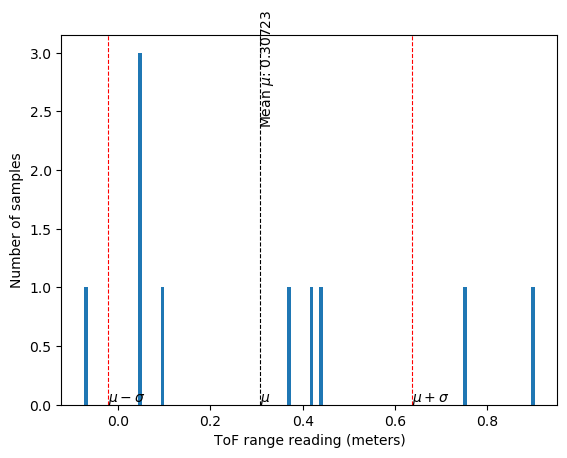

In [3]:
# Execute here the script plotting the variance histogram with matplotlib output
from variance_estimator import main

IR_DATA_PATH = EXERCISE_DIRECTORY+'ir_data.txt'

%matplotlib inline

main(filepath=IR_DATA_PATH)

**Task (Written Section 1.3.3):** Record the resulting sample variance value in `ukf2d_written_solutions.tex`. Also include an image of your histogram in `ukf2d_written_solutions.tex`.

**Task:** Enter this sample variance value into the code for `self.ukf.R` in the `initialize_ukf_matrices()` method.

Also, execute the cell below and insert this value in the field that appears. This will allow the simulator to use the value you found. 

In [4]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(ir_variance=widgets.BoundedFloatText(0.05,min=0,max=1,step=0.01))
def update_ir_variance(ir_variance : float):
    #create file and write
    content = f"export IR_VARIANCE_ESTIMATE={ir_variance}"
    filepath = "../../assets/IR_VARIANCE_ESTIMATE.sh"
    with open(filepath,'w') as f:
        f.write(content)


interactive(children=(BoundedFloatText(value=0.05, description='ir_variance', max=1.0, step=0.01), Output()), …


## Initialize the Filter

Before the UKF can begin its routine of predicting and updating state estimates, it must be initialized with values for the state estimate $\mathbf{x}_t$ and state covariance matrix $\mathbf{P}_t$, as the first prediction call will rely on propagating these estimates forward in time. There is no set way to initialize the filter, but one common approach is to simply take the first measurements that the system receives and treat them as the best estimate of the state until we have estimates for each variable.

**Task:** For your drone, you want to wait until the first ToF reading comes in and then set the corresponding $z$ position value equal to this measurement. This only accounts for one of the two state variables. For now, initialize $\dot z=0 \text{ m/s}$. Go ahead and implement this state estimate initialization in code in the `ir_data_callback()` method, which gets called each time this ROS node receives a message published by the ToF sensor.

**Task:** In addition to initializing the state estimate, you must initialize the time value corresponding to the state estimate. We provide a method `initialize_input_time()` that accomplishes this, but you must call it in the appropriate location.

Another aspect of the filter that can be initialized upon the first receipt of a measurement is the state covariance matrix $\mathbf{P}_t$. How do we know what values to use for this initialization? Again, this is a design decision that can vary by application. We can directly use the variance of the ToF sensor to estimate an initial variance for the height estimate. We won't worry about initializing the velocity variance or the covariances. If we always knew that we were going to start the filter while the drone is at rest, then we could confidently initialize velocity to 0 and assign a low variance to this estimate.

**Task:** Initialize the $\mathbf{P}_t$ matrix in the `ir_data_callback()` method with the variance of the ToF sensor for the variance of the $z$ position estimate. FilterPy initializes instance variables for you, but you should assign these variables initial values. You can refer to the [FilterPy documentation](https://filterpy.readthedocs.io/en/latest/_modules/index.html) to figure out what variable names to use.

**Task (Written Section 2.1):** How else could you initialize the estimate for $\dot z$ given the raw range readings from the ToF sensor?  Recall that the range readings are an estimate for $z$, and you can differentiate $z$ to get $\dot z$.

Describe in `ukf2d_written_solutions.tex` what you would do and the potential pros and cons of your approach.

_Do not implement this in code._

It is unlikely that the filter initialization will be perfect. Fret not: the Kalman Filter can handle poor initial conditions and eventually still converge to an accurate state estimate. Once your predict-update loop is written, we will be testing out the impact of filter initialization.

## Asynchronous Inputs

The traditional Kalman Filter is described as a loop alternating between predictions and measurement updates. In the real world, however, we might receive control inputs more frequently than we receive measurement updates; as such, instead of throwing away information, we would prefer to perform multiple consecutive predictions. Additionally, our inputs (i.e., control inputs and sensor data) generally arrive asynchronously, yet the traditional Kalman Filter algorithm has the prediction and update steps happen at the same point in time. Furthermore, the sample rates of our inputs are typically not constant, and so we cannot design our filter to be time invariant. These are all problems that should be considered when transitioning from the theoretical algorithm to the practical application.

**Task (Written Section 2.2):** Describe why, in a real-world Kalman Filter implementation, it generally makes sense to be able to perform multiple consecutive predictions before performing a new measurement update, whereas it does not make sense algorithmically to perform multiple consecutive measurement updates before forming a new prediction. It might be helpful to think about the differences between what happens to the state estimate in the prediction versus the update step. Write your answer in `ukf2d_written_solutions.tex`.

**Task:** Implement the predicting and updating of your UKF, keeping in mind the issue of asynchronous inputs. These steps will occur in two ROS subscriber callbacks:
1. `imu_data_callback` when an IMU control input is received
1. `ir_data_callback` when an ToF measurement is received. 

Remember that we want to perform a prediction not only when we receive a new control input but also when we receive a new measurement in order to propagate the state estimate forward to the time of the measurement. One way to do this prediction without a new control input is to assume that the control input remains the same as last time (which is what we suggest); another potential approach might be to not include a control input in those instances (i.e., set it to zeros). The method for our FilterPy UKF object that you want to use to perform the prediction is `self.ukf.predict()`, which takes in a keyword argument `dt` that is the time step since the last state estimate and a keyword argument `u`, corresponding to the argument `u` of `state_transition_function()`, that is a NumPy array with the control input(s). The method to do a measurement update is `self.ukf.update()`, which requires a positional argument consisting of a measurement vector as a NumPy array. Call `self.publish_current_state()` at the end of each callback to publish the new state estimate to a ROS topic.

Note that these callbacks get called in new threads; therefore, there is the potential for collisions when, say, both IMU and ToF data come in almost at the same time and one thread has not had the opportunity to finish its UKF computations. We don't want both threads trying to simultaneously alter the values of certain variables, such as the $\mathbf{P}_t$ matrix when doing a prediction, as this can cause the filter to output nonsensical results and break. Therefore, we have implemented a simple callback blocking scheme (using the `self.in_callback` variable) that ignores a new callback if another callback is going on, essentially dropping packets if there are collisions. While this may not be the optimal or most stable way to handle the issue (one could imagine the IMU callback, for example, always blocking the ToF callback and hence preventing measurement updates), it at least gets rid of the errors that would occur with collisions. If you so desire, feel free to implement your own callback management system that perhaps balances the time allocated to different callbacks.



## Tune and Test the Filter

In this exercise, you will be testing the UKF that you have implemented thus far. You will start by testing on simulated drone data. We have set up the simulation to publish its data on ROS topics so that your UKF program interfaces with the drone’s ROS environment and will be able to be applied directly to real, live data coming from the drone during flight.

### In Simulation
<!-- 
To run your UKF with simulated drone data, you first have to make sure that your package is in the `~/catkin_ws/src` directory on your drone. Your package has a unique name, so you will need to modify some files. There are two places near the top of `package.xml` where you should replace `pidrone_project2_ukf` with your repo name, and similarly there is one place near the top of the `CMakeLists.txt` file where you should do the same. Then, in `~/catkin_ws`, run `catkin_make` to build your package. By running this command, you will be able to run ROS and access nodes from your package. If you experience issues with `catkin`, please do not hesitate to reach out to the TAs. -->

<!-- Make sure you are working with the newest version of our `pidrone_pkg` by running the `git pull` command. -->
<!-- 
In order to test your UKF within our software stack, navigate to the file in `pidrone_pkg/scripts` called `state_estimator.py` and edit the line that assigns a value to `student_project_pkg_dir`, instead inserting your project repo name `project-ukf-2022-yourGithubName`.

Next, run ROS as usual with the `./start_pidrone_code.sh` file in the `pidrone_pkg`. Upon start-up, go ahead and terminate the ToF and flight controller nodes, as these would conflict with the drone simulator's simulated sensors. In the state estimator screen, terminate the current process and then run the following command:

    python state_estimator.py --student --primary ukf2d --others simulator --ir_var IR_VARIANCE_ESTIMATE

with your computed estimate of your ToF sensor's variance that you used to determine the $\mathbf{R}_t$ matrix in your UKF in place of `IR_VARIANCE_ESTIMATE`. This command will automatically -->

Now you will run your 2D UKF as the primary state estimator in simulation. The EMA filter will also be run automatically with the 2D UKF, since the 2D UKF does not provide a very complete state vector in three-dimensional flight scenarios. This will also by default allow you to compare the output of your UKF to the EMA filter on altitude.

You can start the simulator by running, in the root of the `dd21-ukf-lx` directory:

    dts code workbench --sim

On the desktop you will find three icons:

![](../../assets/_images/desktop-icons.png)

* The first one to run the web interface:

    ![](../../assets/_images/web-interface-desktop.png)

* The other two similar ones run the simulator and your two UKF packages (the 2D UKF and the 7D UKF):

    ![](../../assets/_images/simulator-desktop.png)


Run the `Simulator 2D`; this will open a terminal, do not close it.

Open the web interface, and connect to `localhost`. You should see four curves in the **Standard View** of the Height Readings chart:


<figure>
    <img src="../../assets/_images/ukf/height_readings_standard_view.png" width="60%">
    <figcaption>Standard View of the Height Readings Chart with Drone Simulated Data</figcaption>
</figure>


1. Raw ToF Readings: the orange curve that shows the drone simulator's simulated noisy ToF readings
2. UKF Filtered Height: the blue curve that shows your UKF's height estimates, along with a shaded region indicating plus and minus one standard deviation, which is derived from the $z$ position variance in the covariance matrix
3. EMA-Smoothed Altitude: the pink curve that shows the EMA filter's estimates
4. Ground Truth Height: the black curve that is the simulated drone's actual height that we are trying to track with the UKF

If you click on the **UKF Analysis** button, the chart will change over to reveal different datasets:

<figure>
    <img src="../../assets/_images/ukf/height_readings_ukf_analysis.png" width="60%">
    <figcaption>UKF Analysis View of the Height Readings Chart with Drone Simulated Data</figcaption>
</figure>

With this chart, we can analyze the performance of the UKF. The orange curve represents the error between the UKF and ground truth from the simulation; the closer to zero this value, the better the UKF estimates are tracking the actual altitude of the simulated drone. The blue shaded region indicates plus and minus one standard deviation of the UKF's $z$ position estimates. If the system is indeed behaving in a nice Gaussian manner and the UKF is well tuned, then we expect to see about 68% of the points in the orange dataset lying in the blue shaded region. Also note that on the left side of the height plot the standard deviation and error start off relatively high; this is because the filter is starting out, improving its estimates from initial values.

<!-- 
If you are seeing that your UKF altitude estimates are lagging significantly behind the simulated data in the Height Readings chart, then this is likely due to computation overhead. The UKF takes time to compute, and if it tries to compute a prediction and/or update for each sensor value that it receives, it can sometimes fall behind real time. In this case, you should run the state estimator with the ToF and IMU data streams throttled:

    python state_estimator.py --student --primary ukf2d --others simulator --ir_var IR_VARIANCE_ESTIMATE --ir_throttled --imu_throttled -->

Make sure your UKF is producing reasonable outputs that seem to track ground truth pretty well. In the UKF Analytics view of the chart, you should see about two-thirds of the points in the error dataset lying within one standard deviation, based on your UKF's state covariance, relative to ground truth.

To test out your UKF's robustness in the face of poor initialization, you can compare how long it takes the state estimates to converge to accurate values with good initial conditions and with poor initial conditions. You do not have to report or hand in anything for this task; it is just for your understanding of the capabilities of the UKF.



### Testing on the Duckiedrone

Next, you will step out of the realm of simulation and test your UKF on your drone, manually moving it along the vertical axis to test out the response you get with your ToF sensor.

First, quit any existing screens, then calibrate your accelerometer with:

    roscd pidrone_pkg
    python scripts/calibrateAcc.py

You want to make sure your ToF sensor and flight controller nodes are actually running.

The output from the UKF can be evaluated in the JavaScript web interface (in `pidrone_pkg/web/index.html`).

You need now to install the ROS node of the UKF you have just developed. To do so, in the state estimator screen (\`3), terminate the current process and then run the following command on your drone:

    cd ~/catkin_ws
    catkin_make
    pip install --upgrade "pip < 21.0"
    pip install "filterpy<1.4.2"

To start your UKF node you can run from this screen:

    cd $(rospack find pidrone_pkg)/scripts/
    python state_estimator.py --student --primary ukf2d

If you are seeing that your UKF altitude estimates are lagging significantly behind the simulated data in the Height Readings chart, then this is likely due to computation overhead. The UKF takes time to compute, and if it tries to compute a prediction and/or update for each sensor value that it receives, it can sometimes fall behind real time. In this case, you should run the state estimator with the ToF and IMU data streams throttled:

    python state_estimator.py --student --primary ukf2d --ir_throttled --imu_throttled

**Debugging Task:** Test out your UKF by moving your drone up and down and examining the Height Readings chart. Does it behave as you expect? Does the estimated height seem to have more or less noise than the raw ToF sensor reading? If there are unexpected deviations or spikes from the measurements, consider why this might be, especially in comparison to the results you saw when running the UKF in simulation. A possible cause is that the prediction step without a measurement update is not being modeled well or is getting poor/noisy control inputs to the point where the process noise that we assigned was too low. Try tuning the scalar that multiplies the values of the $\mathbf{Q}_t$ matrix `self.ukf.Q` in the `initialize_ukf_matrices()` method to better reflect the variance of the process. You should see a greater standard deviation as well as smaller spikes in the estimates.

Another aspect that you should consider is the prediction that occurs in your IMU callback. Note that the unthrottled sample rate of the ToF sensor is around 80 Hz, while the IMU only comes in at about 30 Hz. Therefore, the control input is being changed less frequently than the predictions and measurement updates occur in the ToF callback. While in the Asynchronous Inputs section we indicated that you should do a prediction whenever you get a new control input, in this application, it might make sense to save computation and only do predictions right before measurement updates. Plus, the accelerometers are noisy, and it can be difficult in a discrete domain to integrate these accelerations and expect accurate position estimates reported before including the measurement update. To keep our estimates reasonable, we can wait for the measurement update step to fuse the noisy prior prediction with the new measurement---and since this step can actually occur more frequently than the control input, we can maintain good measurement-informed estimates while saving on prediction computation. To simplify the problem, we can move the prediction and update out of a sensor callback and in its own loop in the main thread of the program.

**Task:** Modify your UKF to only do predictions and updates in a loop in the main thread of your program, using `rospy.Rate(self.loop_hz)` to regulate the rate at which the UKF tries running (feel free to look up documentation on how to use `rospy.Rate()`). You will want to store the data that come in from the IMU and ToF sensor in instance variables that you can use in your main loop. Note that you should now use the `-hz` flag followed by a number (defaults to 30), rather than the various sensor throttle flags, to alter the rate of your UKF. Visually compare your UKF output to the EMA output.

**Task:** Visually compare the UKF output with and without the IMU running. You should notice a difference in how well/quickly the UKF tracks the measurements when there is no control input to better inform the prediction step.

**Task (Written Section 2.3):** In `ukf2d_written_solutions.tex`, describe how a (well-tuned) Kalman Filter outperforms an exponential moving average (EMA) filter applied to raw sensor data. Test this out by moving your drone up and down and comparing the UKF and EMA estimates. Once your UKF seems to outperform the EMA, attach an image of the Height Readings graph to your `ukf2d_written_solutions.tex` document showing this difference between your UKF and the EMA, and briefly describe the different features.

### In Flight

It's time to fly your drone with the UKF providing it with real-time filtered estimates of its position and velocity along the $z$-axis.

**Task:** Fly your drone while running:

    python state_estimator.py --student --primary ukf2d

with the `-hz` flag as needed. Evaluate its performance using the web interface as you did for the manual motion testing.



## Final Hand-In
Before the project deadline, you must ensure that final versions of your solution files and code are handed in via GitHub Classroom. These files are:

**From the 2D UKF section:**

- `ukf2d_written_solutions.pdf` (compiled from `ukf2d_written_solutions.tex`)
- `student_state_estimator_ukf_2d.py` in the `state_estimators` directory

Then come to TA hours to show us your working UKF code. Note that we will ask you to explain one random `TODO` section that you filled out.